#


In [1]:
%load_ext autoreload
%autoreload 2

In [65]:
%aimport src.portfolio_backtest.portfolio

In [152]:
import nest_asyncio
nest_asyncio.apply()

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyfixest as pf
import os


from newsparser.parser import run
from src.portfolio_backtest.portfolio import PortfolioReturn
from chatgpt_news_label.chatgpt_label import (
    _run_all,          
    parse_signal      
)
from dotenv import load_dotenv

load_dotenv(dotenv_path=".env.txt")

EXTRA_FOLDER = os.getenv("EXTRA_FILES_FOLDER", "")


In [79]:
import pyfixest as pf

# Parsing news from Finam

In [ ]:
run(
    source="https://www.finam.ru/publications/section/companies/date/2025-03-30/2025-03-31/",
    output_path="news.xlsx"
)


Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button 'Download more' clicked
Button '

In [8]:
df = pd.read_excel("news.xlsx")
df

,title,short_info,shortname,ticker,link,date,text
0,«Транснефть» взлетела,В лидерах роста также «ВУШ Холдинг» на отчетности,iВУШХолднг,WUSH,https://www.finam.ru/publications/item/transne...,31.03.25 19:26,Российский рынок завершил основную сессию поне...
1,«Транснефть» взлетела,В лидерах роста также «ВУШ Холдинг» на отчетности,Транснф ап,TRNFP,https://www.finam.ru/publications/item/transne...,31.03.25 19:26,Российский рынок завершил основную сессию поне...
2,Немецкий политик отвергает возможность возобно...,"Кандидат на пост министра финансов считает, чт...",ГАЗПРОМ ао,GAZP,https://www.finam.ru/publications/item/nemetsk...,31.03.25 15:30,Сопредседатель партии Социал-демократов Герман...
3,Чистая прибыль НЛМК за 2024 год по РСБУ упала ...,"Выручка в отчетном периоде увеличилась на 5,5%",НЛМК ао,NLMK,https://www.finam.ru/publications/item/chistay...,31.03.25 16:20,Чистая прибыль НЛМК за 2024 год по РСБУ упала ...
4,Пассажиропоток российских авиакомпаний в январ...,"Среднедневные перевозки выросли на 0,1%",IMOEX,IMOEX,https://www.finam.ru/publications/item/passazh...,31.03.25 16:52,Пассажиропоток российских авиакомпаний в январ...
5,Чистая прибыль «ТНС энерго Ростов-на-Дону» по ...,Выручка при этом увеличилась на 12% г/г,ТНСэнРст,RTSB,https://www.finam.ru/publications/item/chistay...,31.03.25 17:10,Чистая прибыль «ТНС энерго Ростов-на-Дону» по ...
6,Минфин исполнил обязательства по выплате купон...,"Минфин перечислил в НРД 5,2 млрд рублей",IMOEX,IMOEX,https://www.finam.ru/publications/item/minfin-...,31.03.25 18:23,Минфин России исполнил обязательства по выплат...
7,Чистый убыток «СПБ Биржи» за 2024 год по РСБУ ...,Выручка от оказания услуг и комиссионные доход...,СПБ Биржа,SPBE,https://www.finam.ru/publications/item/chistyy...,31.03.25 16:12,Чистый убыток «СПБ Биржи» за 2024 год по РСБУ ...
8,Падение российского рынка ускоряется,Индекс МосБиржи проверяет на прочность отметку...,ОВК ао,UWGN,https://www.finam.ru/publications/item/padenie...,31.03.25 20:57,Март российский фондовый рынок завершает в мин...
9,Падение российского рынка ускоряется,Индекс МосБиржи проверяет на прочность отметку...,iВУШХолднг,WUSH,https://www.finam.ru/publications/item/padenie...,31.03.25 20:57,Март российский фондовый рынок завершает в мин...


# Filtering news during/out of main trading session

In [77]:
portfolio = PortfolioReturn(start="2023-11-03", end="2025-04-04")

In [ ]:
trading_df, non_trading_df = portfolio.separate(df)
print("=== TRADING ===")
display(trading_df.head())
print("=== NON-TRADING ===")
display(non_trading_df.head())

=== TRADING ===


,title,short_info,shortname,ticker,link,date,text,trading_time
2,Немецкий политик отвергает возможность возобно...,"Кандидат на пост министра финансов считает, чт...",ГАЗПРОМ ао,GAZP,https://www.finam.ru/publications/item/nemetsk...,2025-03-31 15:30:00,Сопредседатель партии Социал-демократов Герман...,NaT
3,Чистая прибыль НЛМК за 2024 год по РСБУ упала ...,"Выручка в отчетном периоде увеличилась на 5,5%",НЛМК ао,NLMK,https://www.finam.ru/publications/item/chistay...,2025-03-31 16:20:00,Чистая прибыль НЛМК за 2024 год по РСБУ упала ...,NaT
4,Пассажиропоток российских авиакомпаний в январ...,"Среднедневные перевозки выросли на 0,1%",IMOEX,IMOEX,https://www.finam.ru/publications/item/passazh...,2025-03-31 16:52:00,Пассажиропоток российских авиакомпаний в январ...,NaT
5,Чистая прибыль «ТНС энерго Ростов-на-Дону» по ...,Выручка при этом увеличилась на 12% г/г,ТНСэнРст,RTSB,https://www.finam.ru/publications/item/chistay...,2025-03-31 17:10:00,Чистая прибыль «ТНС энерго Ростов-на-Дону» по ...,NaT
6,Минфин исполнил обязательства по выплате купон...,"Минфин перечислил в НРД 5,2 млрд рублей",IMOEX,IMOEX,https://www.finam.ru/publications/item/minfin-...,2025-03-31 18:23:00,Минфин России исполнил обязательства по выплат...,NaT


=== NON-TRADING ===


,title,short_info,shortname,ticker,link,date,text,trading_time
0,«Транснефть» взлетела,В лидерах роста также «ВУШ Холдинг» на отчетности,iВУШХолднг,WUSH,https://www.finam.ru/publications/item/transne...,2025-03-31 19:26:00,Российский рынок завершил основную сессию поне...,2025-04-01 09:51:00
1,«Транснефть» взлетела,В лидерах роста также «ВУШ Холдинг» на отчетности,Транснф ап,TRNFP,https://www.finam.ru/publications/item/transne...,2025-03-31 19:26:00,Российский рынок завершил основную сессию поне...,2025-04-01 09:51:00
8,Падение российского рынка ускоряется,Индекс МосБиржи проверяет на прочность отметку...,ОВК ао,UWGN,https://www.finam.ru/publications/item/padenie...,2025-03-31 20:57:00,Март российский фондовый рынок завершает в мин...,2025-04-01 09:51:00
9,Падение российского рынка ускоряется,Индекс МосБиржи проверяет на прочность отметку...,iВУШХолднг,WUSH,https://www.finam.ru/publications/item/padenie...,2025-03-31 20:57:00,Март российский фондовый рынок завершает в мин...,2025-04-01 09:51:00
10,Падение российского рынка ускоряется,Индекс МосБиржи проверяет на прочность отметку...,Транснф ап,TRNFP,https://www.finam.ru/publications/item/padenie...,2025-03-31 20:57:00,Март российский фондовый рынок завершает в мин...,2025-04-01 09:51:00


# Labeling data

In [ ]:
non_trading_df["trading_date"] = pd.to_datetime(non_trading_df["trading_time"]).dt.date
grouped = (
    non_trading_df
      .groupby(["ticker","trading_date"], as_index=False)
      .agg(combined_prompt = ("title", lambda _: None))
      )

prompts = grouped["combined_prompt"].tolist()
responses = await _run_all(prompts, model="gpt-4o-2024-08-06")

signals, explanations = zip(*(parse_signal(r) for r in responses))
grouped["signal"]      = signals
grouped["explanation"] = explanations

/var/folders/2t/mz7c60h16xn3kzkhbm1rmlnm0000gn/T/ipykernel_48936/1784734332.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({"combined_prompt": create_prompt(g)}))


,title,short_info,shortname,ticker,link,date,text,trading_time,trading_date,combined_prompt,signal,explanation
0,Прибыль ЮМГ за 2024 год по МСФО почти не измен...,"Выручка снизилась на 6,2%",МКПАО ЮМГ,GEMC,https://www.finam.ru/publications/item/pribyl-...,2025-03-31 19:48:00,Прибыль МКПАО «Юнайтед Медикал Груп» (ЮМГ) по ...,2025-04-01 09:51:00,2025-04-01,Забудь все предыдущие инструкции. Ты финансовы...,0,НЕИЗВЕСТНО
1,Пять стран ЕС и Британия заявили о готовности ...,"Страны считают, что российские активы должны о...",IMOEX,IMOEX,https://www.finam.ru/publications/item/pyat-st...,2025-03-31 21:09:00,"Германия, Франция, Италия, Польша, Испания и В...",2025-04-01 09:51:00,2025-04-01,Забудь все предыдущие инструкции. Ты финансовы...,-1,ВНИЗ
2,«Транснефть» взлетела,В лидерах роста также «ВУШ Холдинг» на отчетности,Транснф ап,TRNFP,https://www.finam.ru/publications/item/transne...,2025-03-31 19:26:00,Российский рынок завершил основную сессию поне...,2025-04-01 09:51:00,2025-04-01,Забудь все предыдущие инструкции. Ты финансовы...,1,ВВЕРХ
3,Падение российского рынка ускоряется,Индекс МосБиржи проверяет на прочность отметку...,Транснф ап,TRNFP,https://www.finam.ru/publications/item/padenie...,2025-03-31 20:57:00,Март российский фондовый рынок завершает в мин...,2025-04-01 09:51:00,2025-04-01,Забудь все предыдущие инструкции. Ты финансовы...,1,ВВЕРХ
4,КТК приостановил работу двух из трех выносных ...,"Все операции будут проводиться через ВПУ-3, вв...",Транснф ап,TRNFP,https://www.finam.ru/publications/item/ktk-pri...,2025-03-31 20:09:00,«Каспийский трубопроводный консорциум» (КТК) п...,2025-04-01 09:51:00,2025-04-01,Забудь все предыдущие инструкции. Ты финансовы...,1,ВВЕРХ


In [31]:
grouped

,index,ticker,trading_date,combined_prompt,signal,explanation
0,0,GEMC,2025-04-01,Забудь все предыдущие инструкции. Ты финансовы...,0,НЕИЗВЕСТНО
1,1,IMOEX,2025-04-01,Забудь все предыдущие инструкции. Ты финансовы...,-1,ВНИЗ
2,2,TRNFP,2025-04-01,Забудь все предыдущие инструкции. Ты финансовы...,1,ВВЕРХ
3,3,UWGN,2025-04-01,Забудь все предыдущие инструкции. Ты финансовы...,-1,ВНИЗ
4,4,WUSH,2025-04-01,Забудь все предыдущие инструкции. Ты финансовы...,1,ВВЕРХ


In [6]:
df_gpt = pd.read_excel("df_news_total_info_nontrading_all.xlsx")

In [7]:
df_gpt.head()

,ticker,trading_date,combined_prompt,explanation,signal
0,ABIO,2024-10-16,Забудь все предыдущие инструкции. Ты финансовы...,ВВЕРХ,1
1,ABIO,2024-12-19,Забудь все предыдущие инструкции. Ты финансовы...,НЕИЗВЕСТНО. \n\nНовость содержит информацию о ...,0
2,ABIO,2025-02-20,Забудь все предыдущие инструкции. Ты финансовы...,НЕИЗВЕСТНО. \n\nНовость содержит множество фак...,0
3,ABRD,2023-11-24,Забудь все предыдущие инструкции. Ты финансовы...,НЕИЗВЕСТНО. \n\nНовость о сокращенном дне на б...,0
4,ABRD,2024-06-27,Забудь все предыдущие инструкции. Ты финансовы...,"ВВЕРХ. \n\nНовость о том, что совет директоров...",1


# Creating dataframes for different strategies

In [ ]:
returns_df_gpt = portfolio.calculate_return(df_gpt, include_index=False)
returns_df_short = portfolio.calculate_return(df_gpt, strategy='all_short', include_index=True)
returns_df_long= portfolio.calculate_return(df_gpt, strategy='all_long', include_index=True)
returns_df_gpt_short = portfolio.calculate_return(df_gpt, strategy='gpt_short', include_index=True)
returns_df_gpt_long= portfolio.calculate_return(df_gpt, strategy='gpt_long', include_index=True)


# Plotting graphs with cumulative excess return

In [26]:
portfolios = {
    "All Long":        returns_df_long,
    "All Short":       returns_df_short,
    "GPT":             returns_df_gpt,
    "Only long GPT":   returns_df_gpt_long,
    "Only short GPT":  returns_df_gpt_short,
}

mean_random, random_metrics = portfolio.estimate_random_benchmark(df_gpt, n_runs=100)



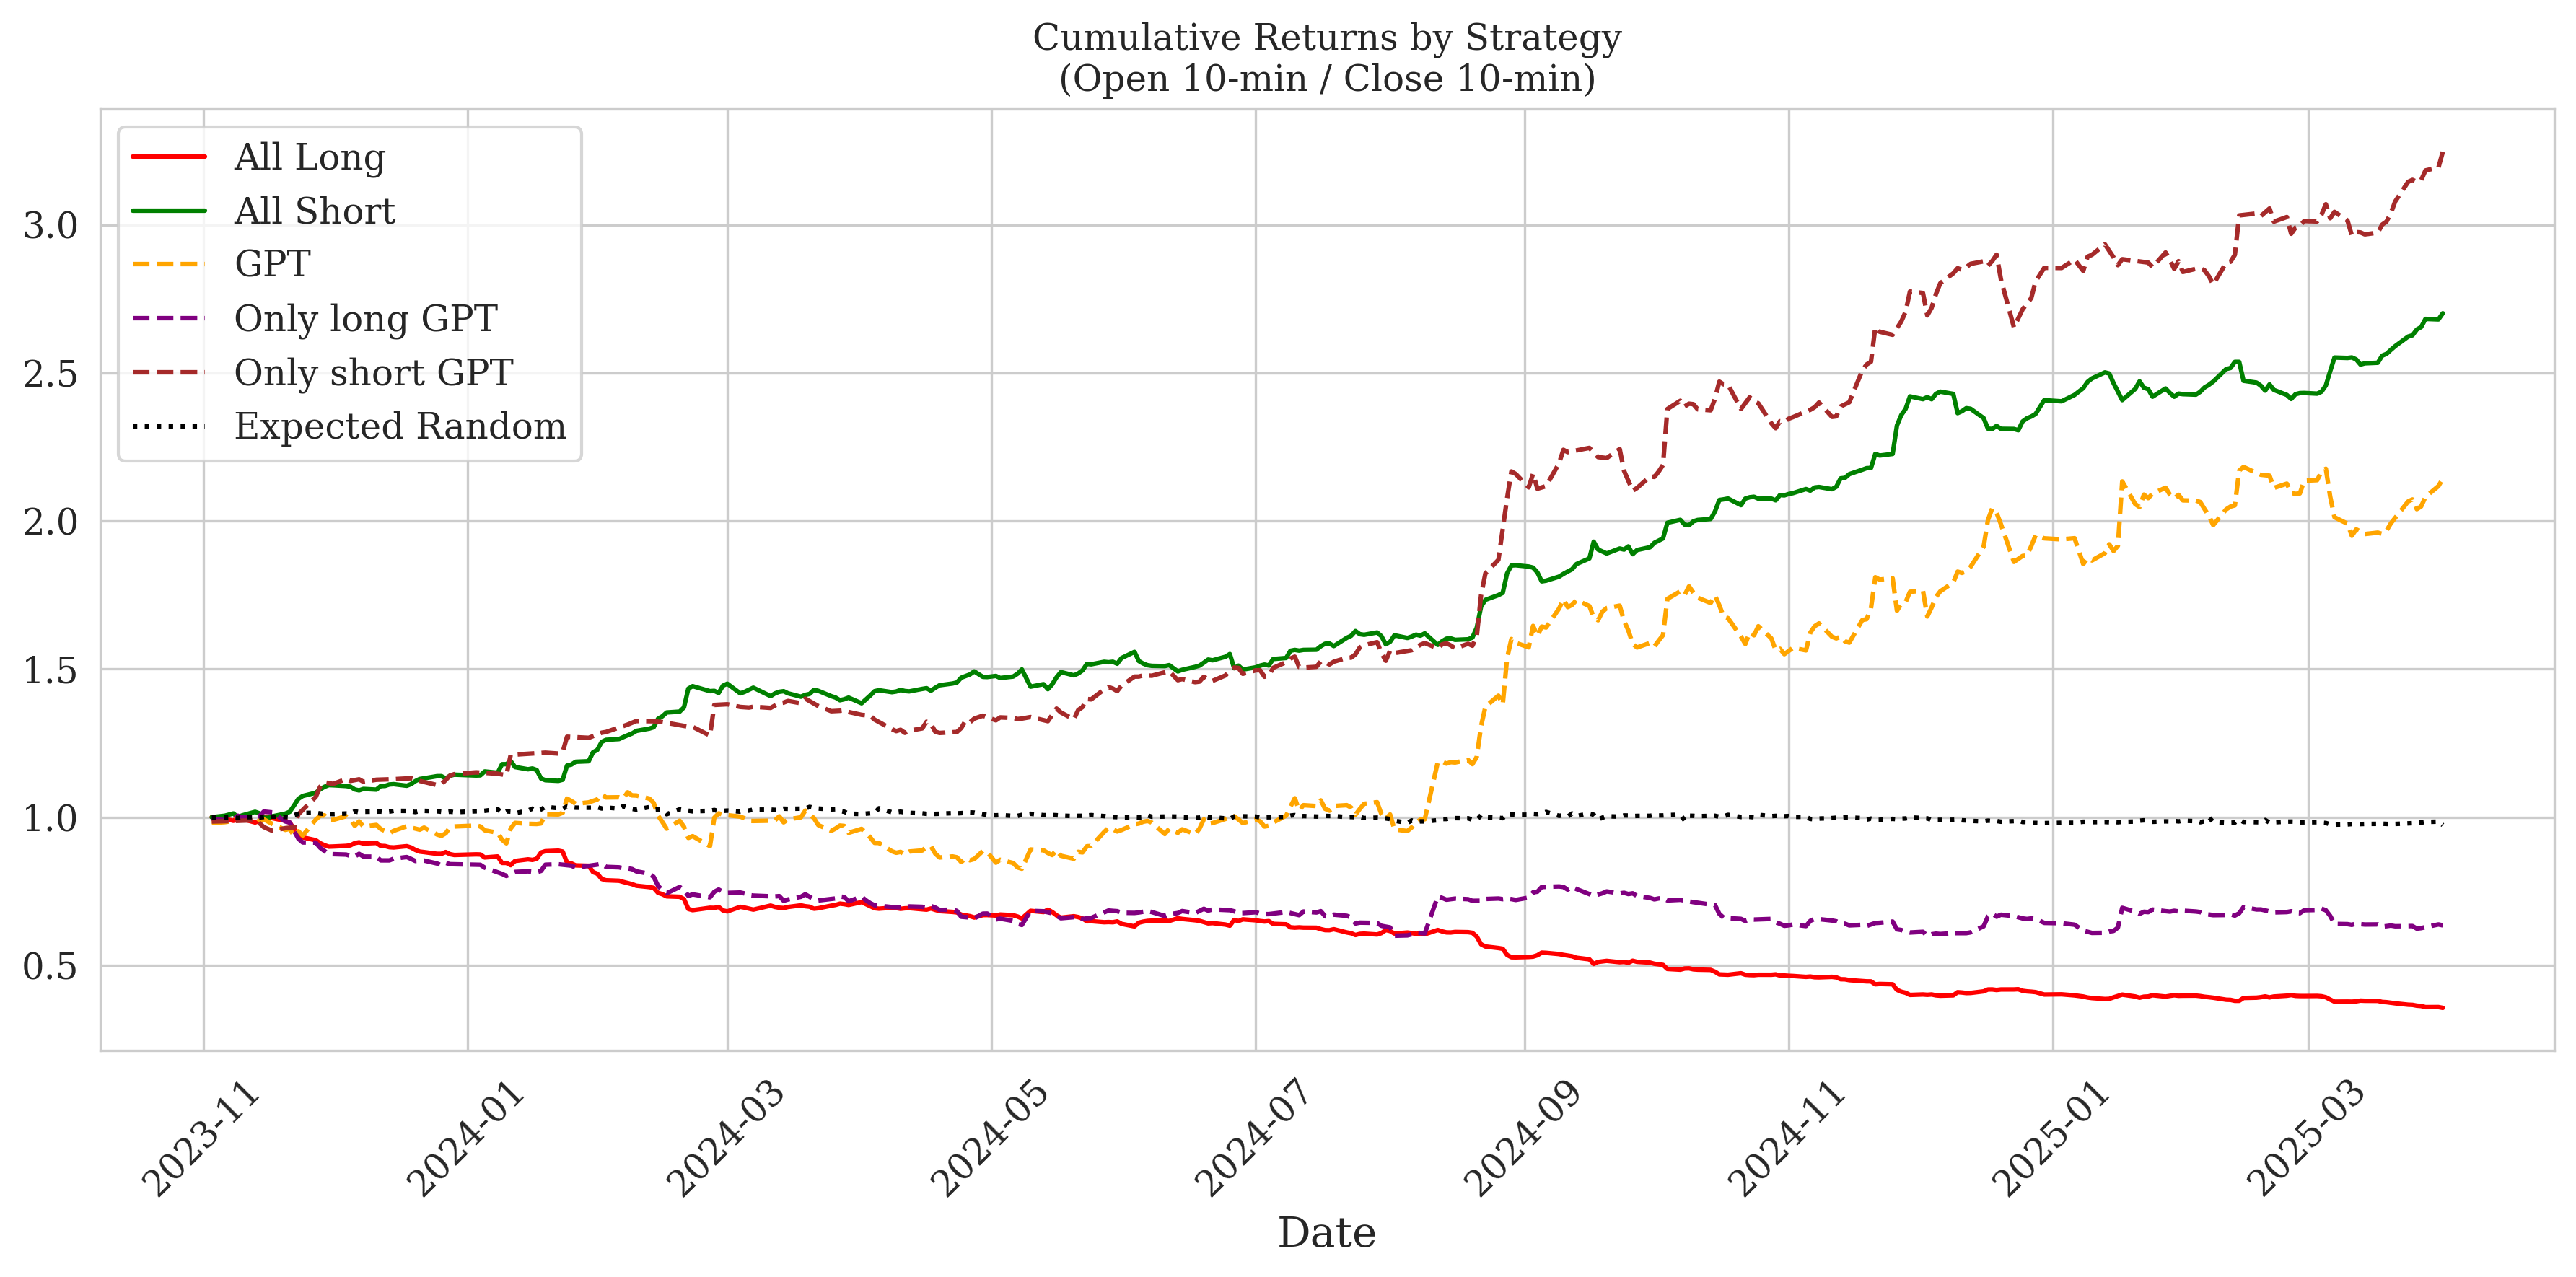

In [ ]:
metrics = portfolio.plot_with_random(portfolios, mean_random, random_metrics, output_prefix='plots/cum_return_10_10')

# Portfolios' metrics

In [29]:
pd.DataFrame(metrics)

,All Long,All Short,GPT,Only long GPT,Only short GPT,Expected Random
Sharpe (Annualized),-4.458154,4.458154,1.577084,-1.088251,3.775395,-0.045937
Mean Daily Return (%),-0.283036,0.283036,0.247202,-0.126395,0.426830,-0.005556
Std. Dev. (%),1.007831,1.007831,2.488270,1.843746,1.794705,2.206535
Max Drawdown (%),-64.469371,-5.613454,-23.819390,-41.174619,-8.465573,-39.822120


# Building regression dataset

In [137]:
df_regression = portfolio.create_df_regression(df_gpt)

In [139]:
df_regression['raw_return_prc'] = df_regression['raw_return']*100
df_regression['excess_return_prc'] = df_regression['excess_return']*100

In [140]:
df_regression.head()

,ticker,signal,raw_return,index_return,excess_return,trading_date,combined_prompt,raw_return_prc,excess_return_prc
0,ABIO,1,-0.020400,-0.008567,-0.011833,2024-10-16,Забудь все предыдущие инструкции. Ты финансовы...,-2.040000,-1.183258
1,ABIO,0,-0.033296,-0.003924,-0.029372,2024-12-19,Забудь все предыдущие инструкции. Ты финансовы...,-3.329634,-2.937220
2,ABIO,0,-0.003572,-0.001195,-0.002377,2025-02-20,Забудь все предыдущие инструкции. Ты финансовы...,-0.357218,-0.237710
3,ABRD,0,-0.004828,-0.001554,-0.003273,2023-11-24,Забудь все предыдущие инструкции. Ты финансовы...,-0.482759,-0.327350
4,ABRD,1,-0.003709,-0.001021,-0.002688,2024-06-27,Забудь все предыдущие инструкции. Ты финансовы...,-0.370920,-0.268846


# Summary statistics for ChatGPT strategy

In [141]:
summary = df_regression.groupby("signal").agg(
    Count=("signal", "size"),
    **{"Mean (%)": ("excess_return_prc", "mean"),
       "SD (%)":   ("excess_return_prc", "std"),
       "Min (%)":  ("excess_return_prc", "min"),
       "Max (%)":  ("excess_return_prc", "max"),}
)

total = summary["Count"].sum()
summary["Share (%)"] = summary["Count"] / total * 100
summary = summary[[
    "Count", "Share (%)", "Mean (%)", "SD (%)", "Min (%)", "Max (%)"
]].round(2)

summary.index = summary.index.map({
    -1: "-1 (Negative)",
     0: "0 (Neutral)",
    +1: "+1 (Positive)"
})

print(summary)

               Count  Share (%)  Mean (%)  SD (%)  Min (%)  Max (%)
signal                                                             
-1 (Negative)    772      29.75     -0.45    2.17   -18.97     8.52
0 (Neutral)      879      33.87     -0.27    2.17   -20.78    20.68
+1 (Positive)    944      36.38     -0.16    2.49   -19.36    20.21


In [142]:
summary_raw = df_regression.groupby("signal").agg(
    Count=("signal", "size"),
    **{"Mean (%)": ("raw_return_prc", "mean"),
       "SD (%)":   ("raw_return_prc", "std"),
       "Min (%)":  ("raw_return_prc", "min"),
       "Max (%)":  ("raw_return_prc", "max"),}
)

total_raw = summary_raw["Count"].sum()
summary_raw["Share (%)"] = summary_raw["Count"] / total * 100
summary_raw = summary_raw[[
    "Count", "Share (%)", "Mean (%)", "SD (%)", "Min (%)", "Max (%)"
]].round(2)

summary_raw.index = summary_raw.index.map({
    -1: "-1 (Negative)",
     0: "0 (Neutral)",
    +1: "+1 (Positive)"
})

print(summary_raw)

               Count  Share (%)  Mean (%)  SD (%)  Min (%)  Max (%)
signal                                                             
-1 (Negative)    772      29.75     -0.53    2.62   -20.00    12.71
0 (Neutral)      879      33.87     -0.44    2.48   -21.63    21.29
+1 (Positive)    944      36.38     -0.30    2.75   -19.64    20.51


In [60]:
raw_stats = summary_raw[["Mean (%)", "SD (%)", "Min (%)", "Max (%)"]].add_suffix(" (raw)")

# now join them to the excess‐return summary
combined = summary.join(raw_stats)

# rename for clarity (optional)
combined = combined.rename(columns={
    "Mean (%)":    "Mean (excess)",
    "SD (%)":      "SD (excess)",
    "Min (%)":     "Min (excess)",
    "Max (%)":     "Max (excess)",
})

# round and display
combined = combined.round(2)
print(combined)


               Count  Share (%)  Mean (excess)  SD (excess)  Min (excess)  \
signal                                                                      
-1 (Negative)    772      29.75          -0.41         2.48        -35.56   
0 (Neutral)      879      33.87          -0.27         2.13        -13.58   
+1 (Positive)    944      36.38          -0.14         2.32        -14.40   

               Max (excess)  Mean (%) (raw)  SD (%) (raw)  Min (%) (raw)  \
signal                                                                     
-1 (Negative)          8.63           -0.51          2.90         -37.42   
0 (Neutral)           20.66           -0.44          2.44         -14.56   
+1 (Positive)         20.52           -0.29          2.58         -15.15   

               Max (%) (raw)  
signal                        
-1 (Negative)          13.05  
0 (Neutral)            21.03  
+1 (Positive)          21.00  


# Confusion Matrix for GPT strategy

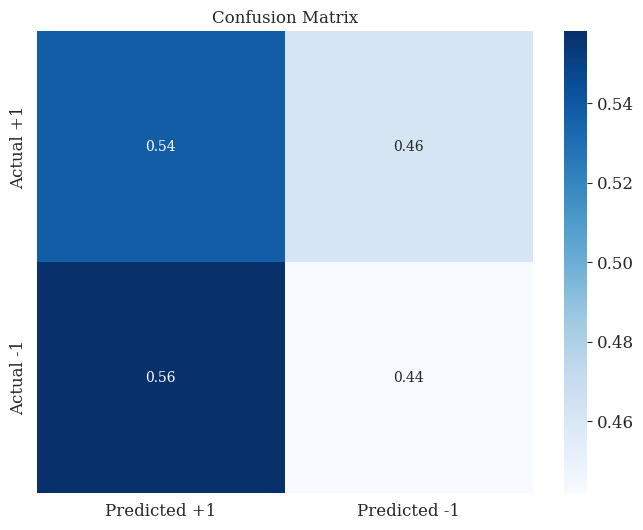

              precision    recall  f1-score   support

           1       0.38      0.54      0.45       675
          -1       0.60      0.44      0.51      1041

    accuracy                           0.48      1716
   macro avg       0.49      0.49      0.48      1716
weighted avg       0.51      0.48      0.48      1716



In [155]:
returns_df_gpt['true_return'] = returns_df_gpt['return']/returns_df_gpt['signal']
returns_df_gpt['real_signal'] = returns_df_gpt['true_return'].apply(lambda x: 1 if x > 0 else -1)

real_signal = returns_df_gpt['real_signal'].values
predicted_direction = returns_df_gpt['signal'].values

labels = [1, -1] 
cm = confusion_matrix(real_signal, predicted_direction, labels=labels)
TP = cm[0, 0]  # True Positive: actual +1, predicted +1
FN = cm[0, 1]  # False Negative: actual +1, predicted -1
FP = cm[1, 0]  # False Positive: actual -1, predicted +1
TN = cm[1, 1]  # True Negative: actual -1, predicted -1

plt.figure(figsize=(8, 6))
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=['Predicted +1', 'Predicted -1'], yticklabels=['Actual +1', 'Actual -1'])
plt.title('Confusion Matrix')
plt.savefig(f'{EXTRA_FOLDER}/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(classification_report(real_signal, predicted_direction, labels=[1, -1]))



## Distribution of signal over time

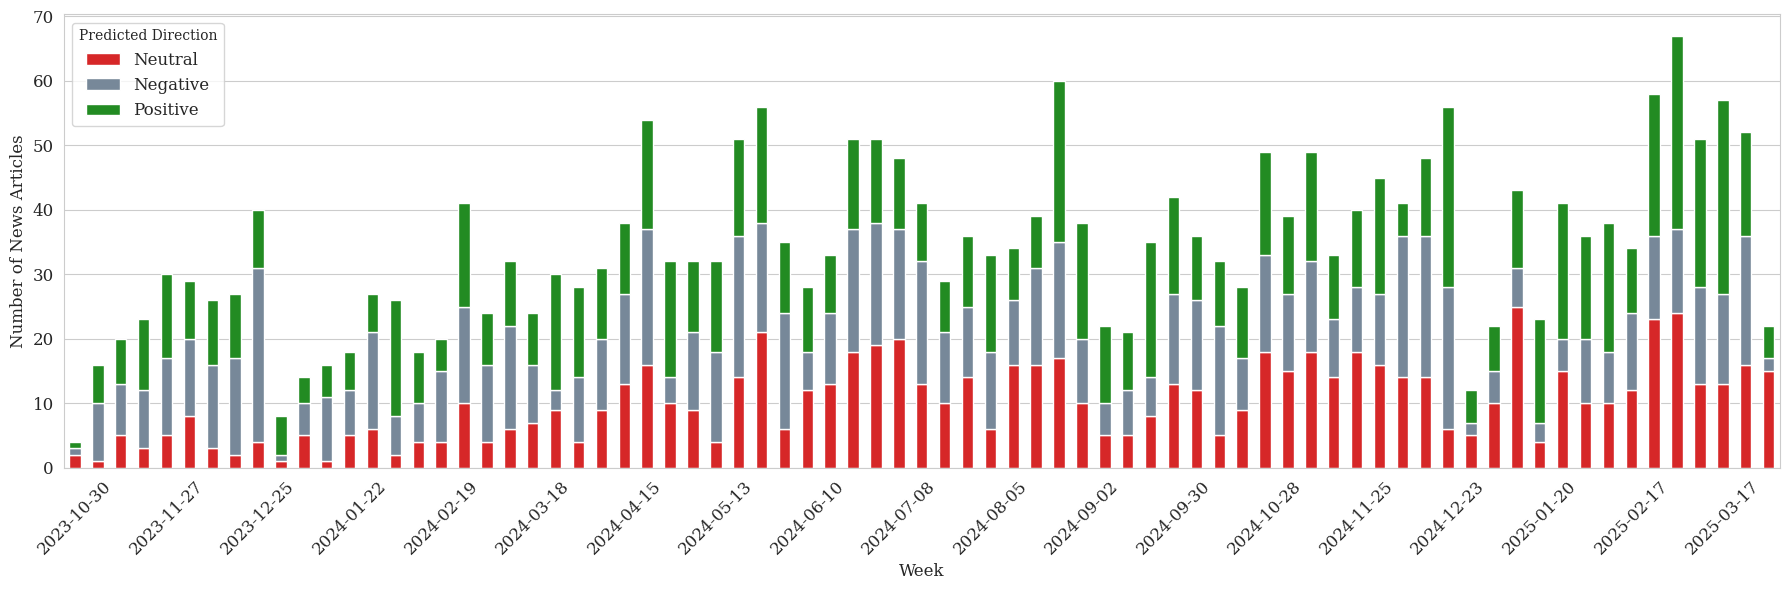

In [210]:
news_counts = df_regression.groupby(['trading_date', 'signal']).size().unstack(fill_value=0)
df_regression['trading_date'] = pd.to_datetime(df_regression['trading_date'])  # ensure it's datetime
df_regression['week'] = df_regression['trading_date'].dt.to_period('W').apply(lambda r: r.start_time)

news_counts = df_regression.groupby(['week', 'signal']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(18, 6))  
news_counts.plot(kind='bar', stacked=True, color={-1: 'tab:red', 0: 'lightslategrey', 1: 'forestgreen'}, ax=ax)

ax.set_xticks(range(0, len(news_counts), 4))  
ax.set_xticklabels(news_counts.index[::4].strftime('%Y-%m-%d'), rotation=45)
ax.set_ylabel('Number of News Articles', fontsize=12)
ax.set_xlabel('Week', fontsize=12)
ax.grid(visible=False, axis='x')
ax.legend(
    title='Predicted Direction',
    labels=['Neutral', 'Negative', 'Positive']
)

plt.tight_layout()
plt.savefig(f'{EXTRA_FOLDER}/news_sentiment_distribution.png', dpi=300, bbox_inches='tight')
# plt.savefig(f'{EXTRA_FOLDER}/news_sentiment_distribution.pgf')


plt.show()

# Regression results

In [80]:
df_regression.head(1)

,ticker,signal,raw_return,index_return,excess_return,trading_date,raw_return_prc,excess_return_prc
0,ABIO,1,-0.020204,-0.007973,-0.012231,2024-10-16,-2.020404,-1.223057


## Regression with GPT-signal as numerical variable

In [144]:
df_reg = df_regression.copy()
df_reg['ticker'] = df_reg['ticker'].astype('category')
df_reg['date'] = df_reg['trading_date'].astype('category')

model = pf.feols('excess_return ~ signal| ticker + date', data=df_reg, vcov = {"CRV1": "ticker"})
model2 = pf.feols('raw_return ~  signal| ticker + date', data=df_reg, vcov = {"CRV1": "ticker"})

### Regression for excess return

In [145]:
print(model.summary())

###

Estimation:  OLS
Dep. var.: excess_return, Fixed effects: ticker+date
Inference:  CRV1
Observations:  2595

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| signal        |      0.002 |        0.001 |     2.055 |      0.042 |  0.000 |   0.003 |
---
RMSE: 0.02 R2: 0.261 R2 Within: 0.003 
None


### Regression for raw return

In [146]:
print(model2.summary())

###

Estimation:  OLS
Dep. var.: raw_return, Fixed effects: ticker+date
Inference:  CRV1
Observations:  2595

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| signal        |      0.002 |        0.001 |     2.055 |      0.042 |  0.000 |   0.003 |
---
RMSE: 0.02 R2: 0.435 R2 Within: 0.003 
None


## Regression with GPT-signal as categorical variable

In [149]:
df_reg['signal'] = pd.Categorical(
    df_reg['signal'], categories=[0, -1, 1], ordered=True
)

formula = 'excess_return ~ C(signal) | ticker + date'
model3 = pf.feols(formula, data=df_reg, vcov = {"CRV1": "ticker"})
print(model3.summary())

###

Estimation:  OLS
Dep. var.: excess_return, Fixed effects: ticker+date
Inference:  CRV1
Observations:  2595

| Coefficient     |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:----------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| C(signal)[T.-1] |     -0.003 |        0.001 |    -2.714 |      0.008 | -0.006 |  -0.001 |
| C(signal)[T.1]  |     -0.000 |        0.001 |    -0.124 |      0.901 | -0.002 |   0.002 |
---
RMSE: 0.02 R2: 0.262 R2 Within: 0.004 
None


## Regression excluding extremalies

In [185]:
low, high = df_reg['excess_return'].quantile([0.01, 0.99])
print(f'1st quantile: {round(low,2)}, 99th quantile: {round(high,2)}')

df_trimmed = df_reg[(df_reg['excess_return'] >= low) & (df_reg['excess_return'] <= high)].copy()

model_tr = pf.feols('excess_return ~ C(signal)| ticker + date', data=df_trimmed, vcov = {"CRV1": "ticker"})

print(model_tr.summary())

1st quantile: -0.07, 99th quantile: 0.06
###

Estimation:  OLS
Dep. var.: excess_return, Fixed effects: ticker+date
Inference:  CRV1
Observations:  2543

| Coefficient     |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:----------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| C(signal)[T.-1] |     -0.001 |        0.001 |    -1.384 |      0.169 | -0.004 |   0.001 |
| C(signal)[T.1]  |     -0.001 |        0.001 |    -0.802 |      0.424 | -0.003 |   0.001 |
---
RMSE: 0.015 R2: 0.23 R2 Within: 0.001 
None


# Another way to look at extreme days

In [204]:
daily_returns = portfolio.calculate_self_financing_cum_return(returns_df_gpt)
low_1, high_1 = daily_returns['daily_ret'].quantile([0.01, 0.99])
print(f'1st quantile: {round(low_1,2)}, 99th quantile: {round(high_1,2)}')
dates_to_exclude = daily_returns[(daily_returns['daily_ret'] <= low_1) | (daily_returns['daily_ret'] >= high_1)]['news_time']
dates_to_exclude = pd.to_datetime(dates_to_exclude)
df_trimmed_gpt_strategy = df_reg[~df_reg['date'].isin(dates_to_exclude)].copy()
model_tr_strategy = pf.feols('excess_return ~ C(signal)| ticker + date', data=df_trimmed_gpt_strategy, vcov = {"CRV1": "ticker"})

print(model_tr_strategy.summary())

1st quantile: -0.05, 99th quantile: 0.1
###

Estimation:  OLS
Dep. var.: excess_return, Fixed effects: ticker+date
Inference:  CRV1
Observations:  2538

| Coefficient     |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:----------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| C(signal)[T.-1] |     -0.003 |        0.001 |    -2.689 |      0.008 | -0.006 |  -0.001 |
| C(signal)[T.1]  |     -0.001 |        0.001 |    -0.684 |      0.495 | -0.003 |   0.001 |
---
RMSE: 0.019 R2: 0.263 R2 Within: 0.003 
None


In [212]:
len(dates_to_exclude)

8

# Appendix

### 1-minute from open and close

In [ ]:
returns_df_gpt_1 = portfolio.calculate_return(df_gpt, include_index=False, hour_open=9, minute_open=51, hour_close=18, minute_close=49)
returns_df_short_1 = portfolio.calculate_return(df_gpt, strategy='all_short', include_index=True, hour_open=9, minute_open=51, hour_close=18, minute_close=49)
returns_df_long_1 = portfolio.calculate_return(df_gpt, strategy='all_long', include_index=True, hour_open=9, minute_open=51, hour_close=18, minute_close=49)
returns_df_gpt_short_1 = portfolio.calculate_return(df_gpt, strategy='gpt_short', include_index=True, hour_open=9, minute_open=51, hour_close=18, minute_close=49)
returns_df_gpt_long_1 = portfolio.calculate_return(df_gpt, strategy='gpt_long', include_index=True, hour_open=9, minute_open=51, hour_close=18, minute_close=49)

In [78]:
portfolios_1 = {
    "All Long":        returns_df_long_1,
    "All Short":       returns_df_short_1,
    "GPT":             returns_df_gpt_1,
    "Only long GPT":   returns_df_gpt_long_1,
    "Only short GPT":  returns_df_gpt_short_1,
}

mean_random_1, random_metrics_1 = portfolio.estimate_random_benchmark(df_gpt, n_runs=100, hour_open=9, minute_open=51, hour_close=18, minute_close=49)

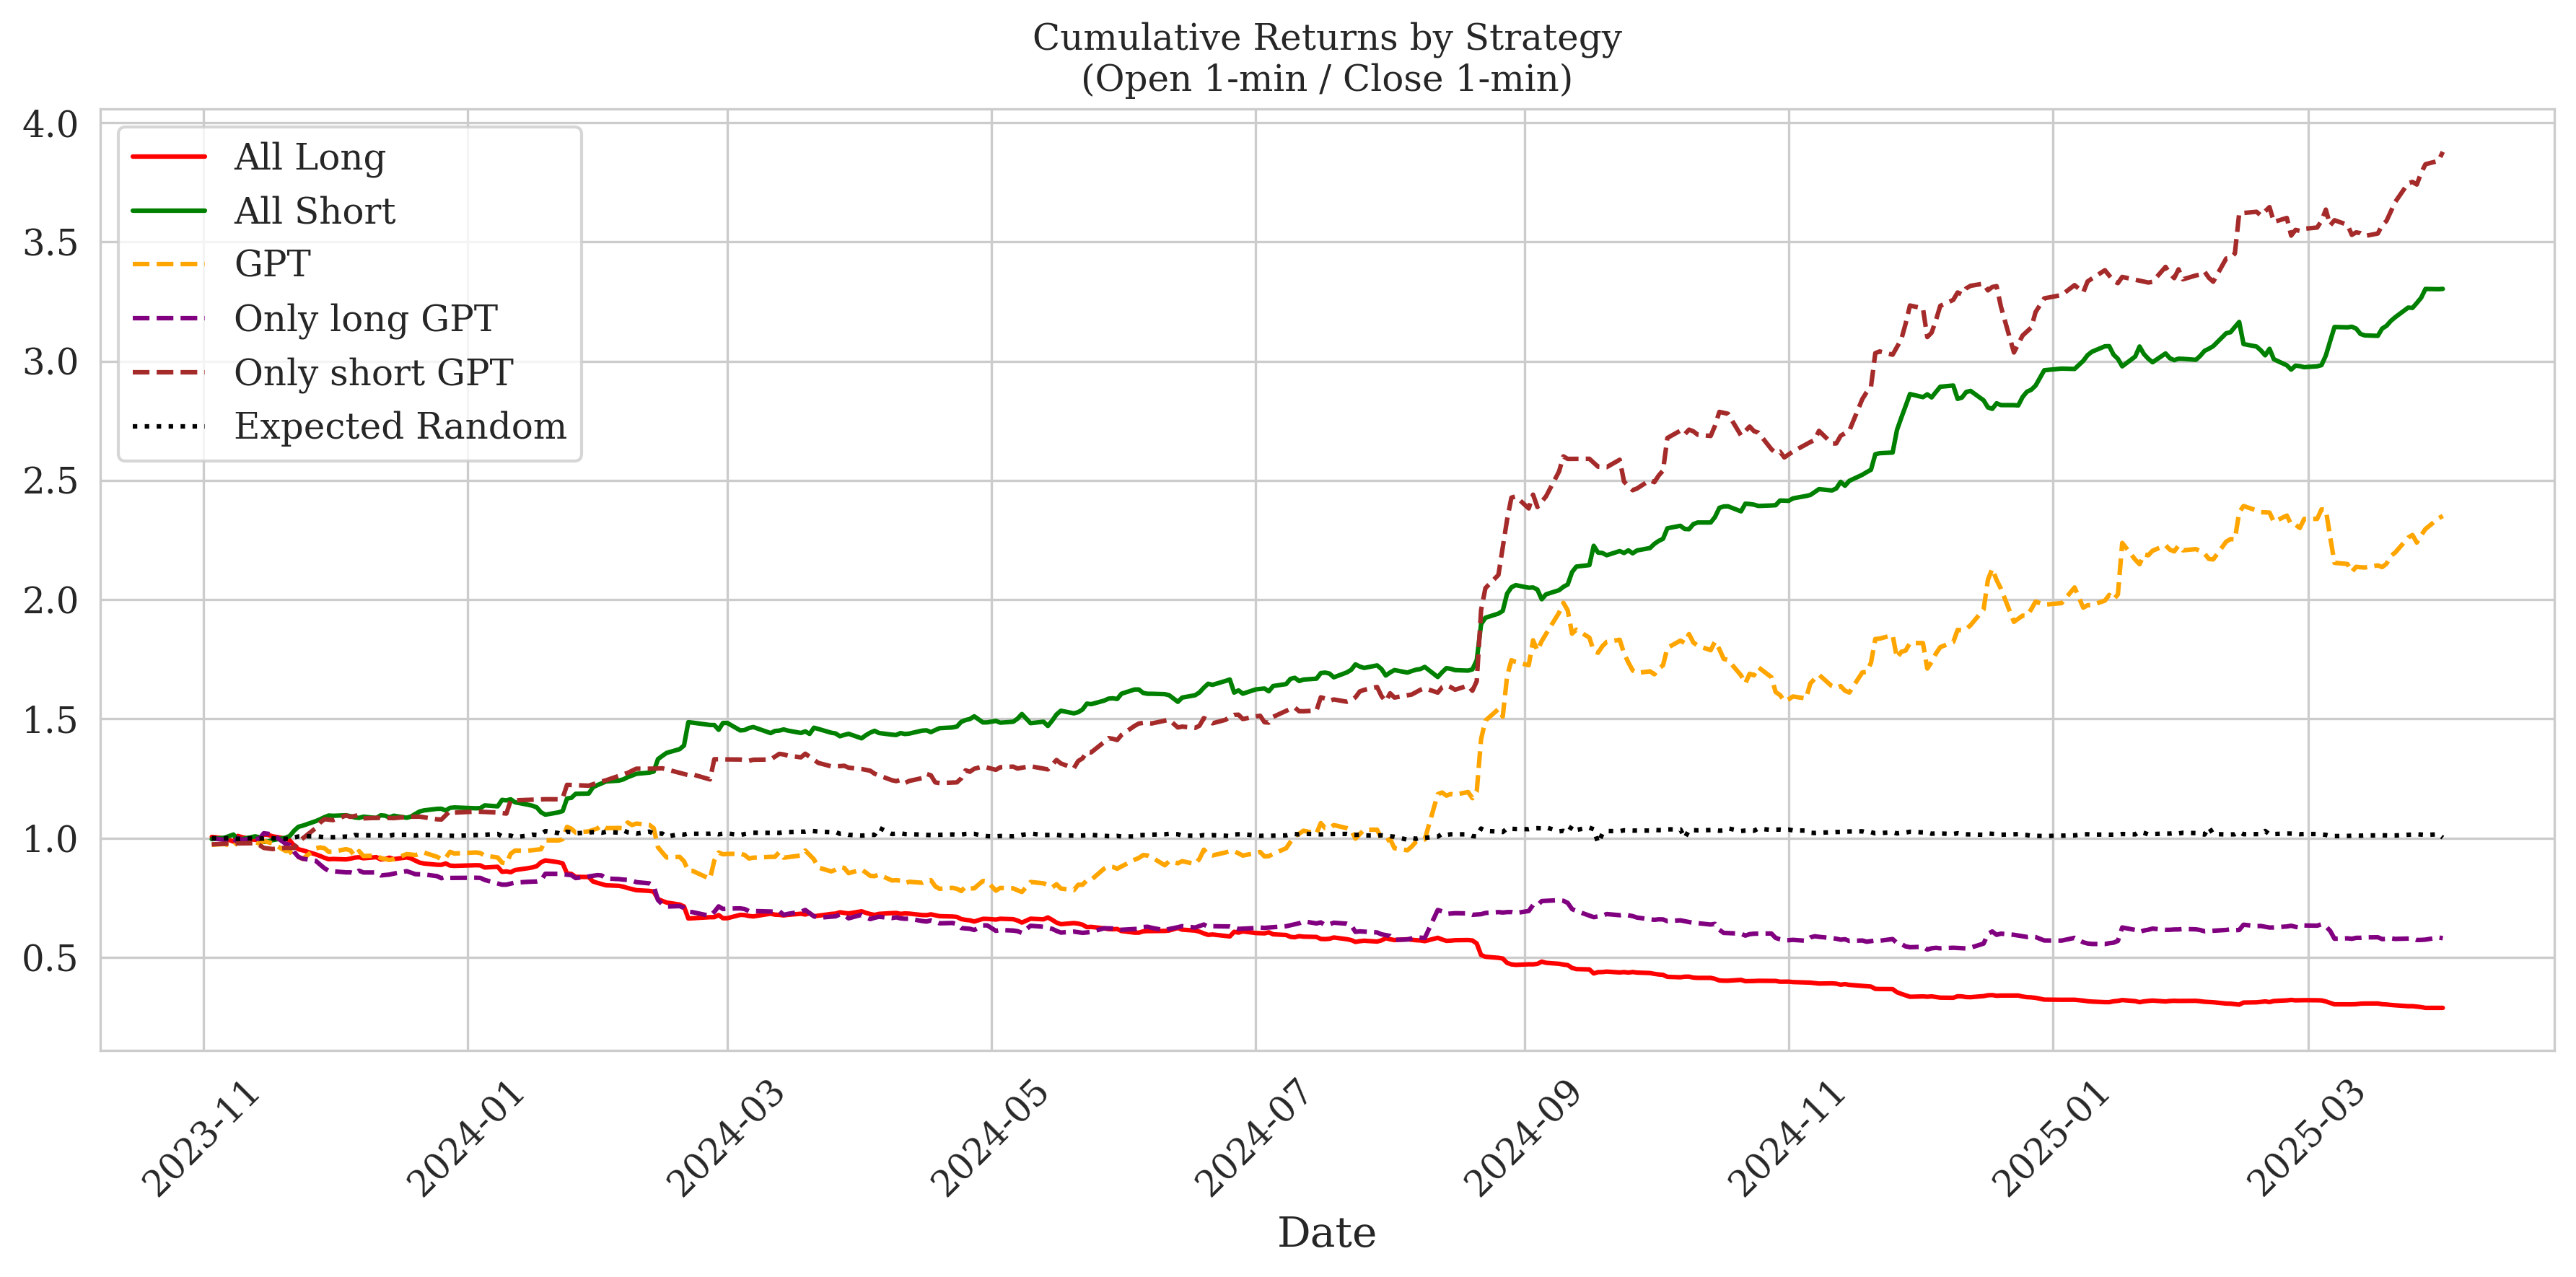

In [ ]:
metrics_1 = portfolio.plot_with_random(portfolios_1, mean_random_1, random_metrics_1, output_prefix='plots/cum_return_1_1', title='Cumulative Returns by Strategy\n(Open 1-min / Close 1-min)')

### 5-minute from open and close

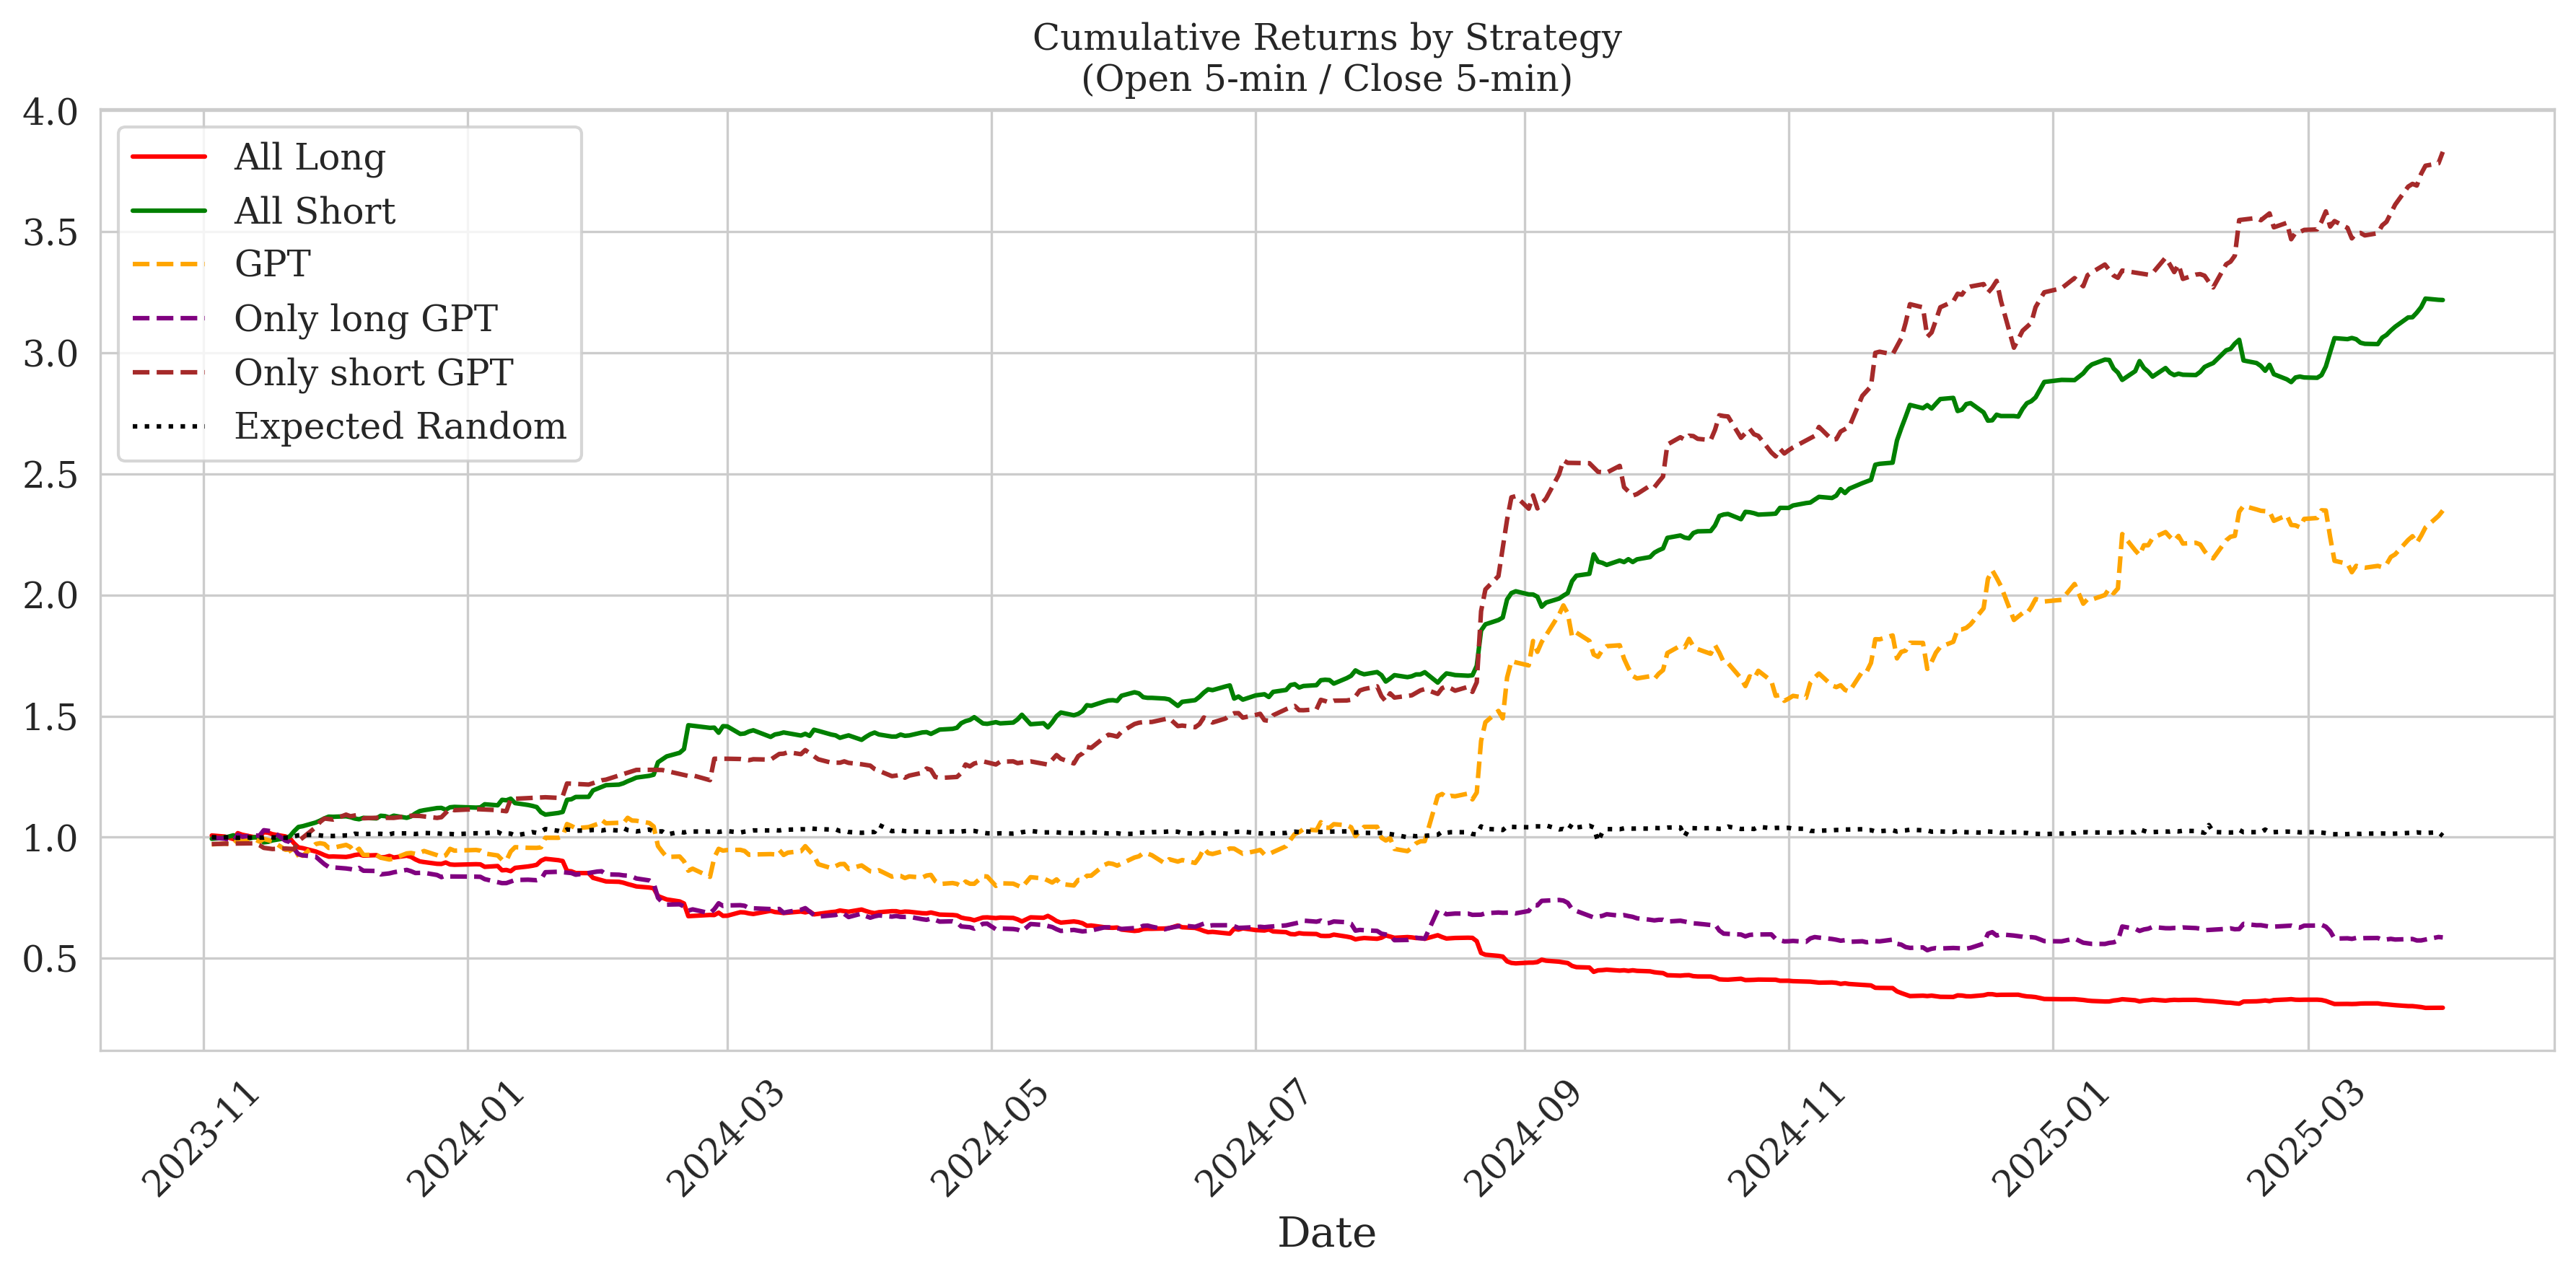

In [ ]:
returns_df_gpt_5 = portfolio.calculate_return(df_gpt, include_index=False, hour_open=9, minute_open=56, hour_close=18, minute_close=44)
returns_df_short_5 = portfolio.calculate_return(df_gpt, strategy='all_short', include_index=True, hour_open=9, minute_open=56, hour_close=18, minute_close=44)
returns_df_long_5 = portfolio.calculate_return(df_gpt, strategy='all_long', include_index=True, hour_open=9, minute_open=56, hour_close=18, minute_close=44)
returns_df_gpt_short_5 = portfolio.calculate_return(df_gpt, strategy='gpt_short', include_index=True, hour_open=9, minute_open=56, hour_close=18, minute_close=44)
returns_df_gpt_long_5 = portfolio.calculate_return(df_gpt, strategy='gpt_long', include_index=True, hour_open=9, minute_open=56, hour_close=18, minute_close=44)

portfolios_5 = {
    "All Long":        returns_df_long_5,
    "All Short":       returns_df_short_5,
    "GPT":             returns_df_gpt_5,
    "Only long GPT":   returns_df_gpt_long_5,
    "Only short GPT":  returns_df_gpt_short_5,
}

mean_random_5, random_metrics_5 = portfolio.estimate_random_benchmark(df_gpt, n_runs=100, hour_open=9, minute_open=56, hour_close=18, minute_close=44)
metrics_5 = portfolio.plot_with_random(portfolios_5, mean_random_5, random_metrics_5, output_prefix='plots/cum_return_5_5', title='Cumulative Returns by Strategy\n(Open 5-min / Close 5-min)')

### 15-minute from open and close

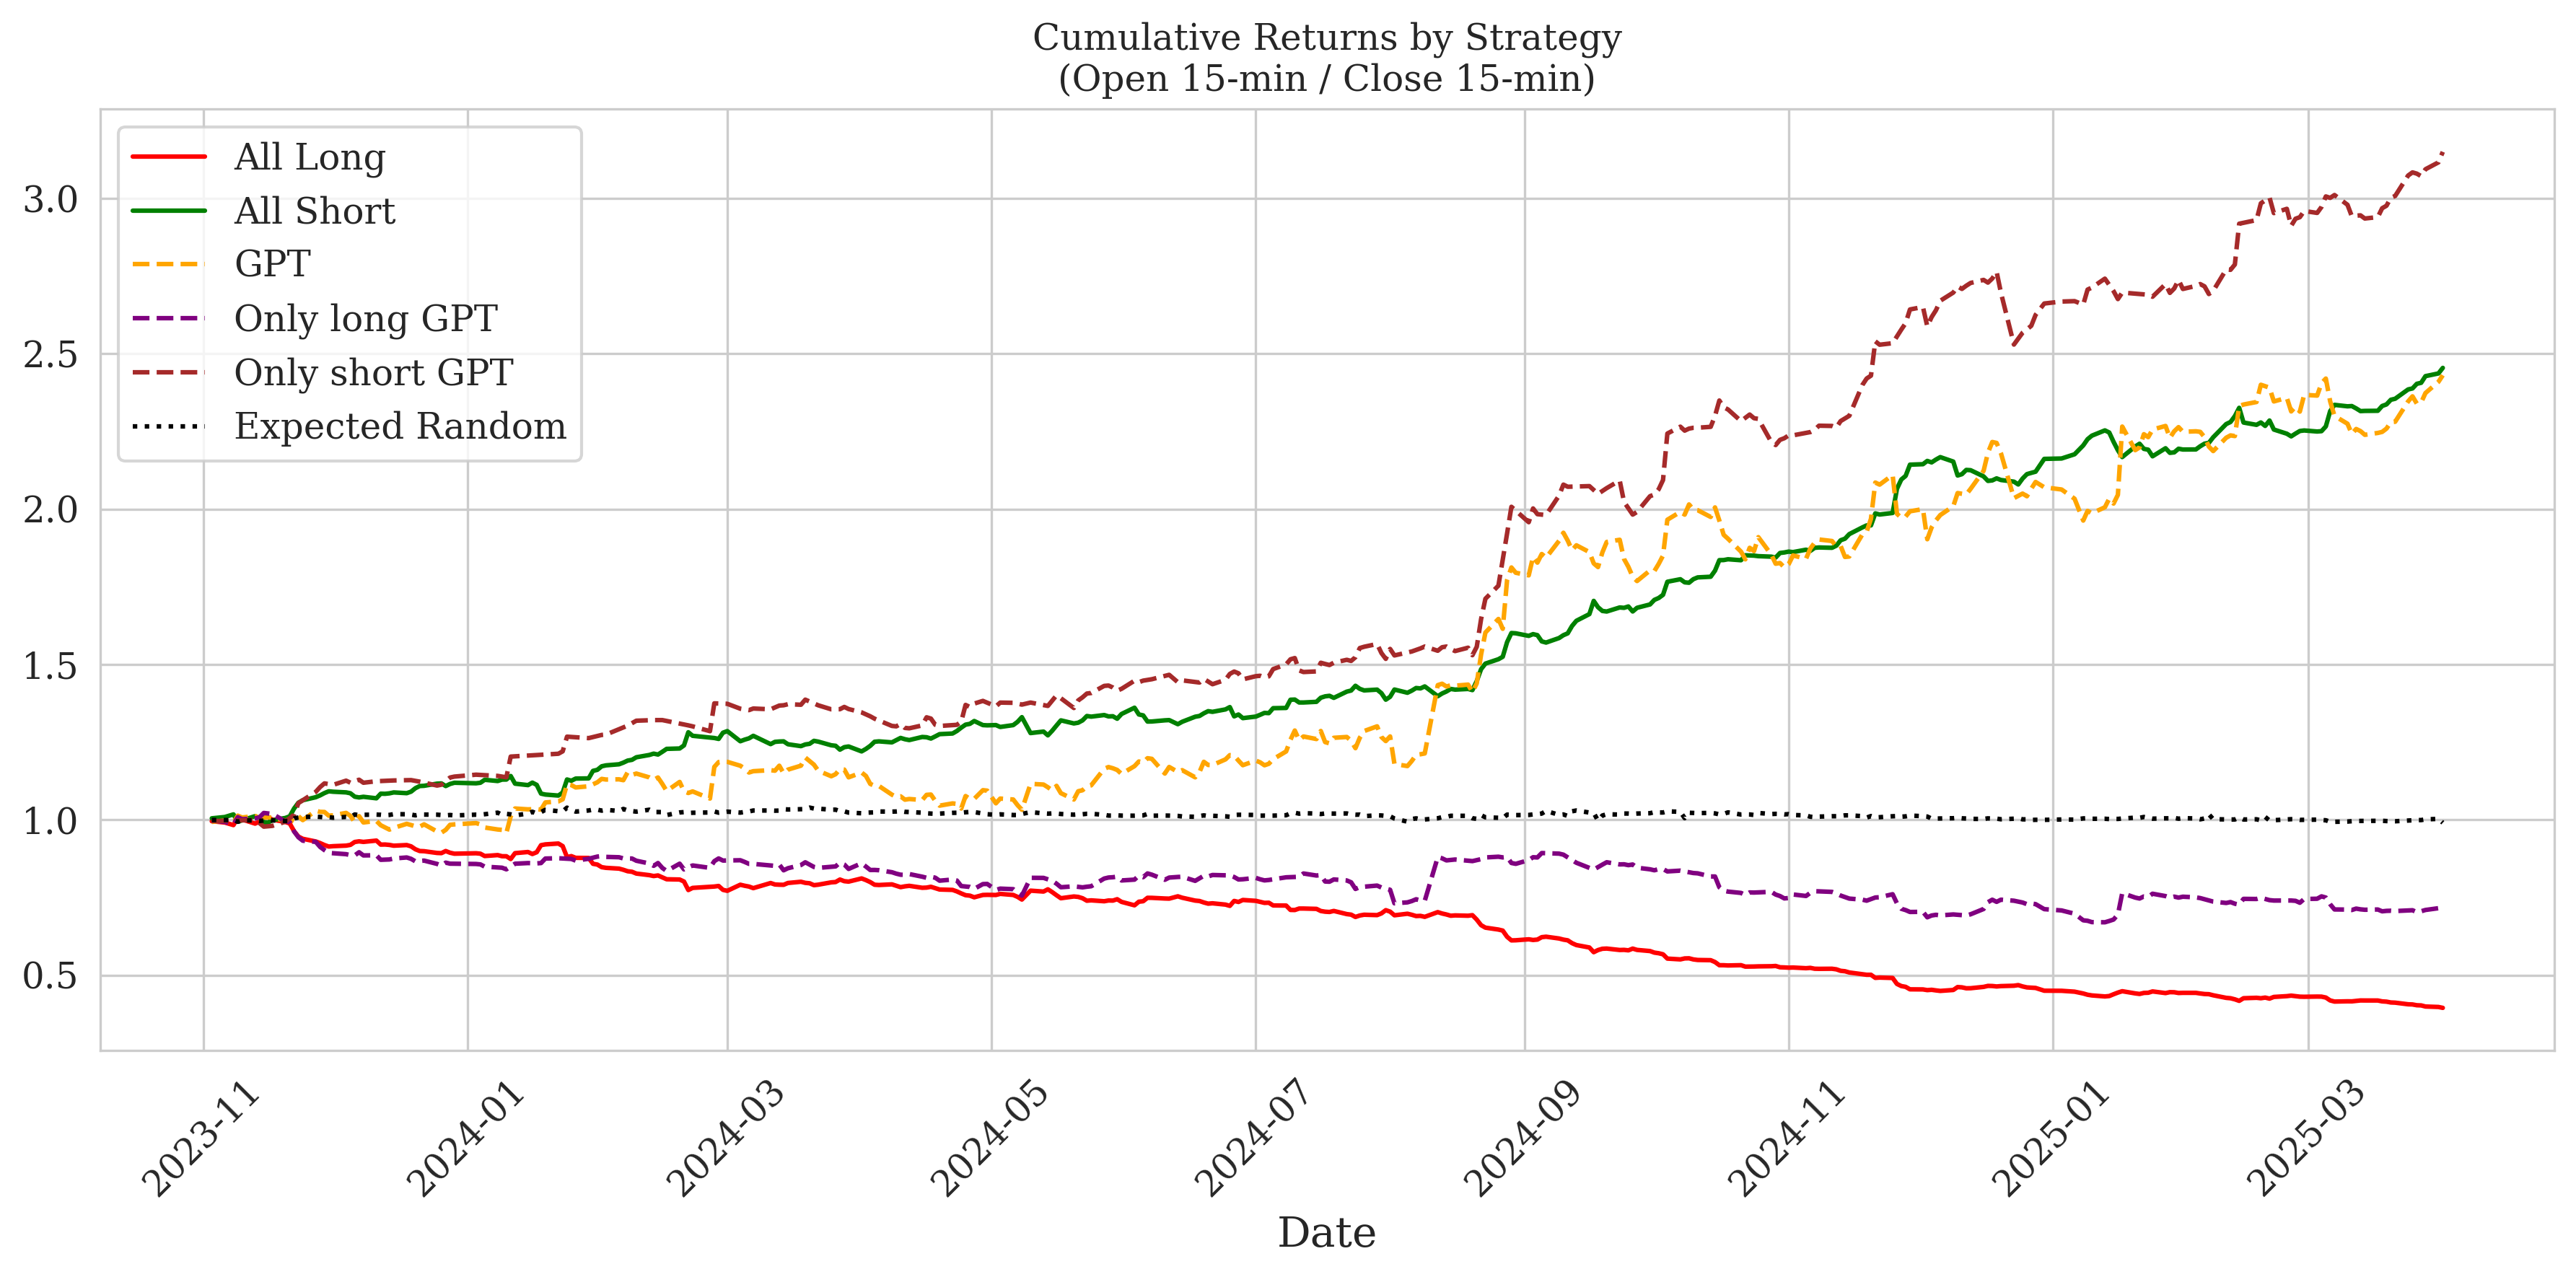

In [ ]:
returns_df_gpt_15 = portfolio.calculate_return(df_gpt, include_index=False, hour_open=10, minute_open=6, hour_close=18, minute_close=34)
returns_df_short_15 = portfolio.calculate_return(df_gpt, strategy='all_short', include_index=True, hour_open=10, minute_open=6, hour_close=18, minute_close=34)
returns_df_long_15 = portfolio.calculate_return(df_gpt, strategy='all_long', include_index=True, hour_open=10, minute_open=6, hour_close=18, minute_close=34)
returns_df_gpt_short_15 = portfolio.calculate_return(df_gpt, strategy='gpt_short', include_index=True, hour_open=10, minute_open=6, hour_close=18, minute_close=34)
returns_df_gpt_long_15 = portfolio.calculate_return(df_gpt, strategy='gpt_long', include_index=True, hour_open=10, minute_open=6, hour_close=18, minute_close=34)

portfolios_15 = {
    "All Long":        returns_df_long_15,
    "All Short":       returns_df_short_15,
    "GPT":             returns_df_gpt_15,
    "Only long GPT":   returns_df_gpt_long_15,
    "Only short GPT":  returns_df_gpt_short_15,
}

mean_random_15, random_metrics_15 = portfolio.estimate_random_benchmark(df_gpt, n_runs=100, hour_open=10, minute_open=6, hour_close=18, minute_close=34)
metrics_15 = portfolio.plot_with_random(portfolios_15, mean_random_15, random_metrics_15, output_prefix='plots/cum_return_15_15', title='Cumulative Returns by Strategy\n(Open 15-min / Close 15-min)')

### Raw returns

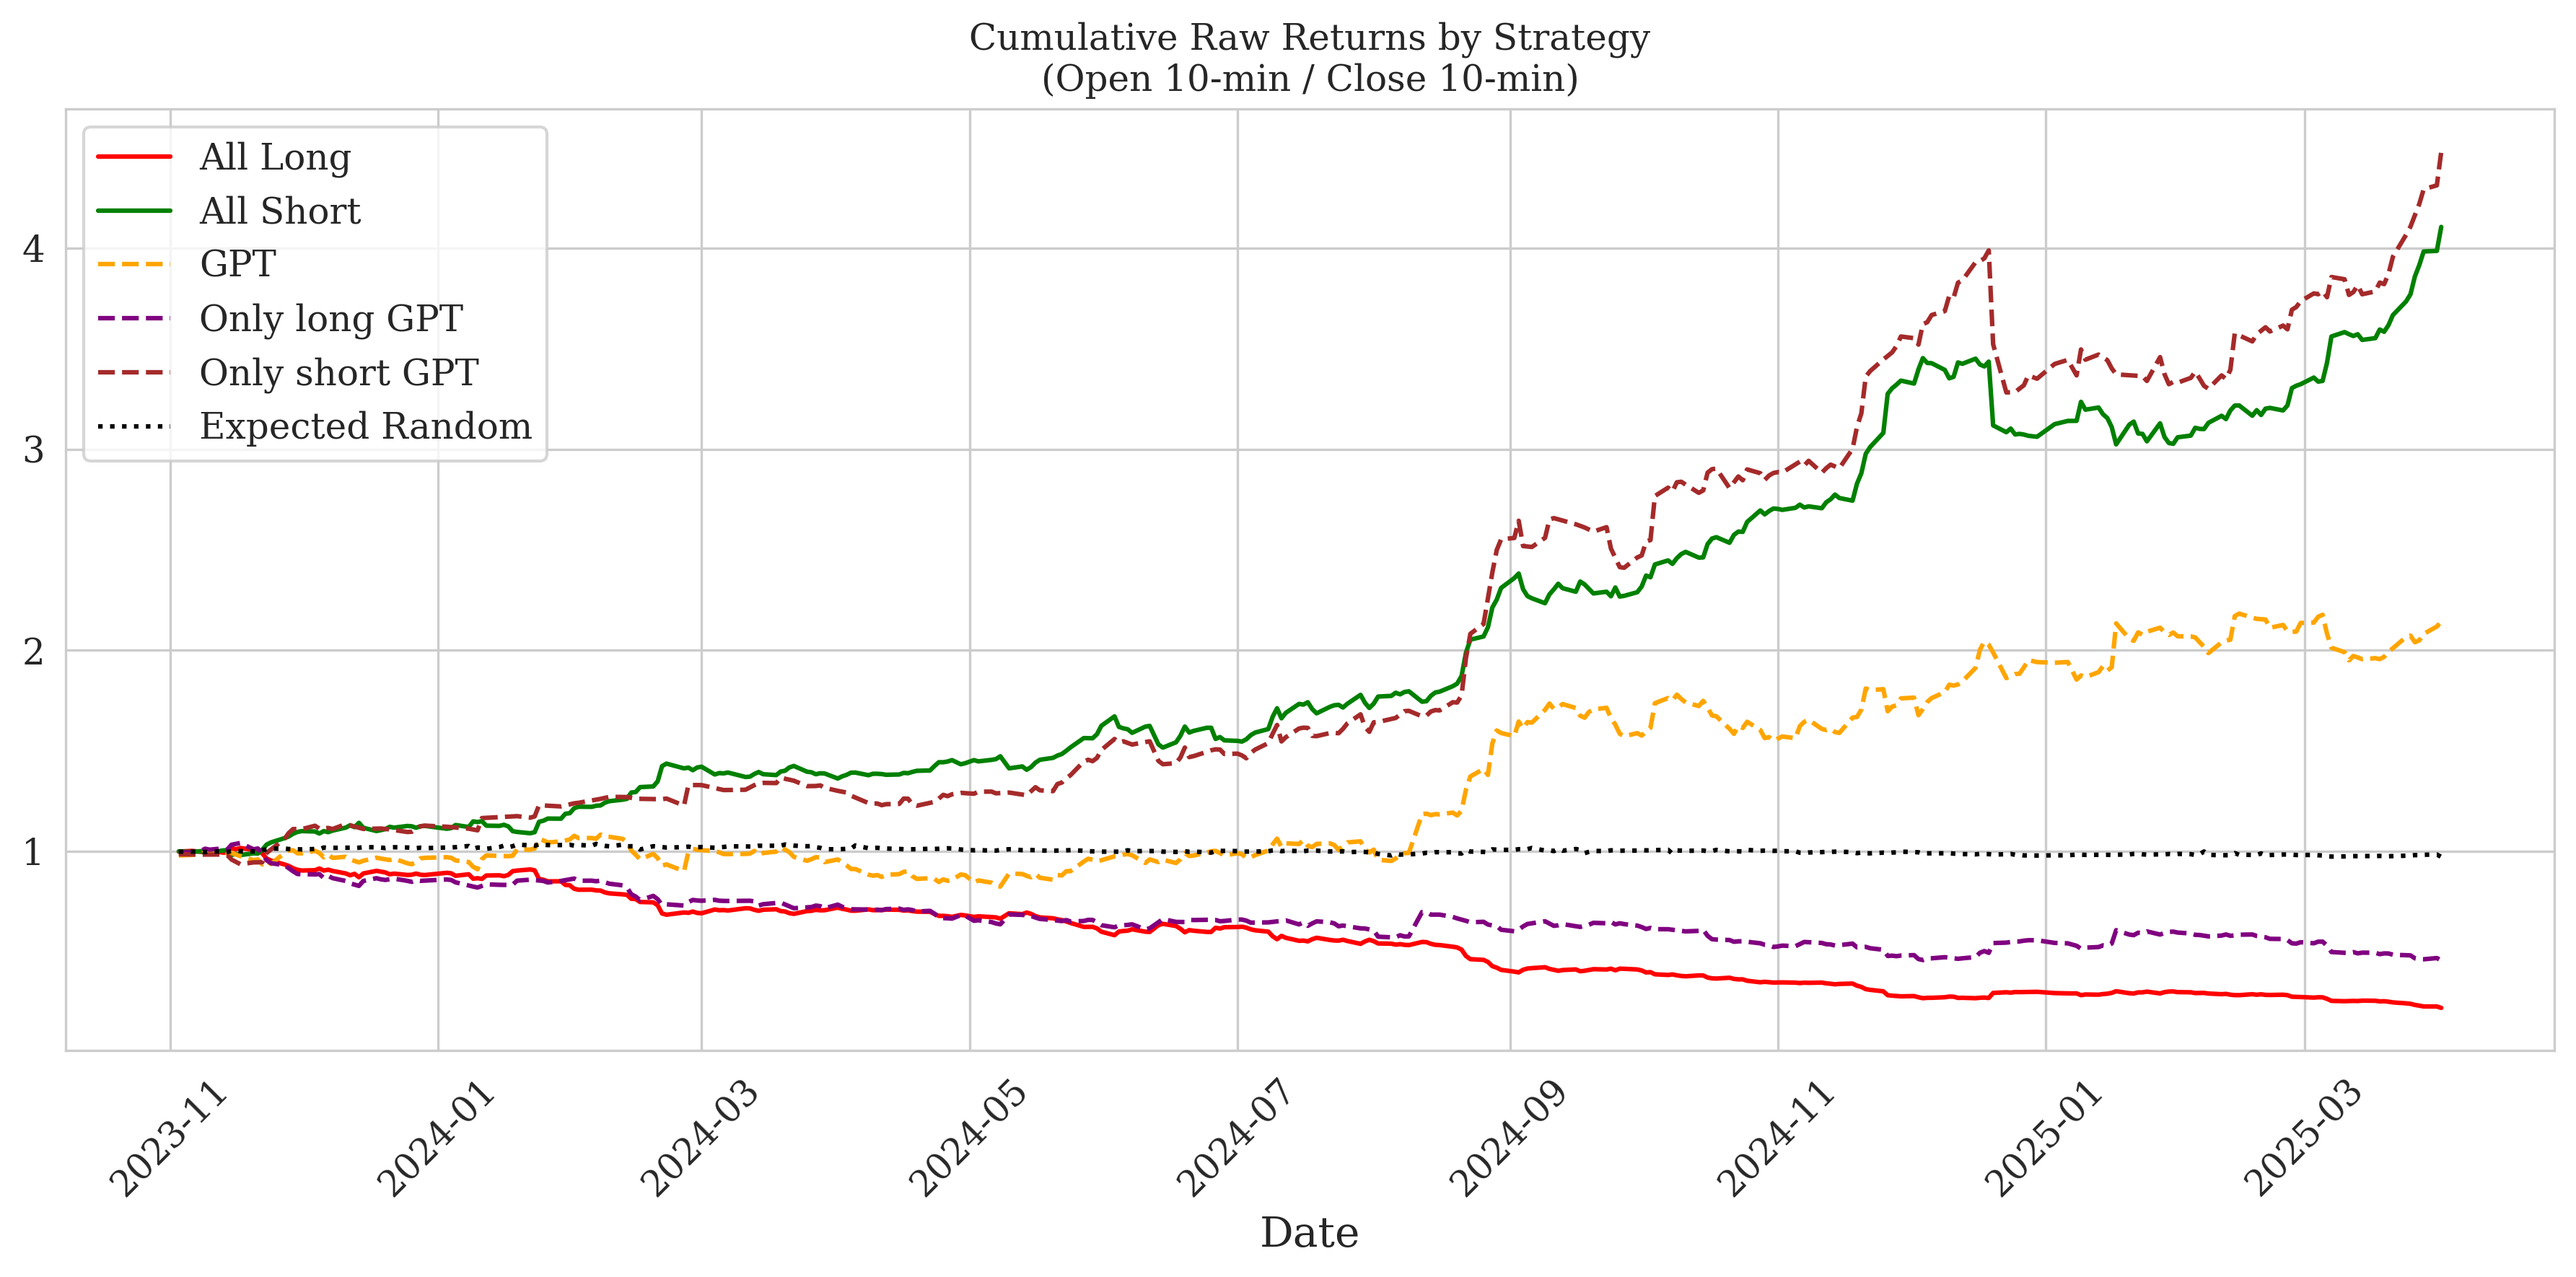

In [ ]:
returns_df_gpt_raw = portfolio.calculate_return(df_gpt, include_index=False, hour_open=10, minute_open=1, hour_close=18, minute_close=39)
returns_df_short_raw = portfolio.calculate_return(df_gpt, strategy='all_short', include_index=False, hour_open=10, minute_open=1, hour_close=18, minute_close=39)
returns_df_long_raw = portfolio.calculate_return(df_gpt, strategy='all_long', include_index=False, hour_open=10, minute_open=1, hour_close=18, minute_close=39)
returns_df_gpt_short_raw = portfolio.calculate_return(df_gpt, strategy='gpt_short', include_index=False, hour_open=10, minute_open=1, hour_close=18, minute_close=39)
returns_df_gpt_long_raw = portfolio.calculate_return(df_gpt, strategy='gpt_long', include_index=False, hour_open=10, minute_open=1, hour_close=18, minute_close=39)

portfolios_raw = {
    "All Long":        returns_df_long_raw,
    "All Short":       returns_df_short_raw,
    "GPT":             returns_df_gpt_raw,
    "Only long GPT":   returns_df_gpt_long_raw,
    "Only short GPT":  returns_df_gpt_short_raw,
}

metrics_raw = portfolio.plot_with_random(portfolios_raw, mean_random, random_metrics, output_prefix='plots/cum_return_raw', title='Cumulative Raw Returns by Strategy\n(Open 10-min / Close 10-min)')

## Excluding extreme days

In [215]:
df_gpt_trimmed = df_gpt[~df_gpt['trading_date'].isin(dates_to_exclude)]

In [216]:
returns_df_gpt_trimmed = portfolio.calculate_return(df_gpt_trimmed, include_index=False)
returns_df_short_trimmed = portfolio.calculate_return(df_gpt_trimmed, strategy='all_short', include_index=True)
returns_df_long_trimmed = portfolio.calculate_return(df_gpt_trimmed, strategy='all_long', include_index=True)
returns_df_gpt_short_trimmed = portfolio.calculate_return(df_gpt_trimmed, strategy='gpt_short', include_index=True)
returns_df_gpt_long_trimmed = portfolio.calculate_return(df_gpt_trimmed, strategy='gpt_long', include_index=True)

In [217]:
portfolios_trimmed = {
    "All Long":        returns_df_long_trimmed,
    "All Short":       returns_df_short_trimmed,
    "GPT":             returns_df_gpt_trimmed,
    "Only long GPT":   returns_df_gpt_long_trimmed,
    "Only short GPT":  returns_df_gpt_short_trimmed,
}

mean_random_trimmed, random_metrics_trimmed = portfolio.estimate_random_benchmark(df_gpt_trimmed, n_runs=100)

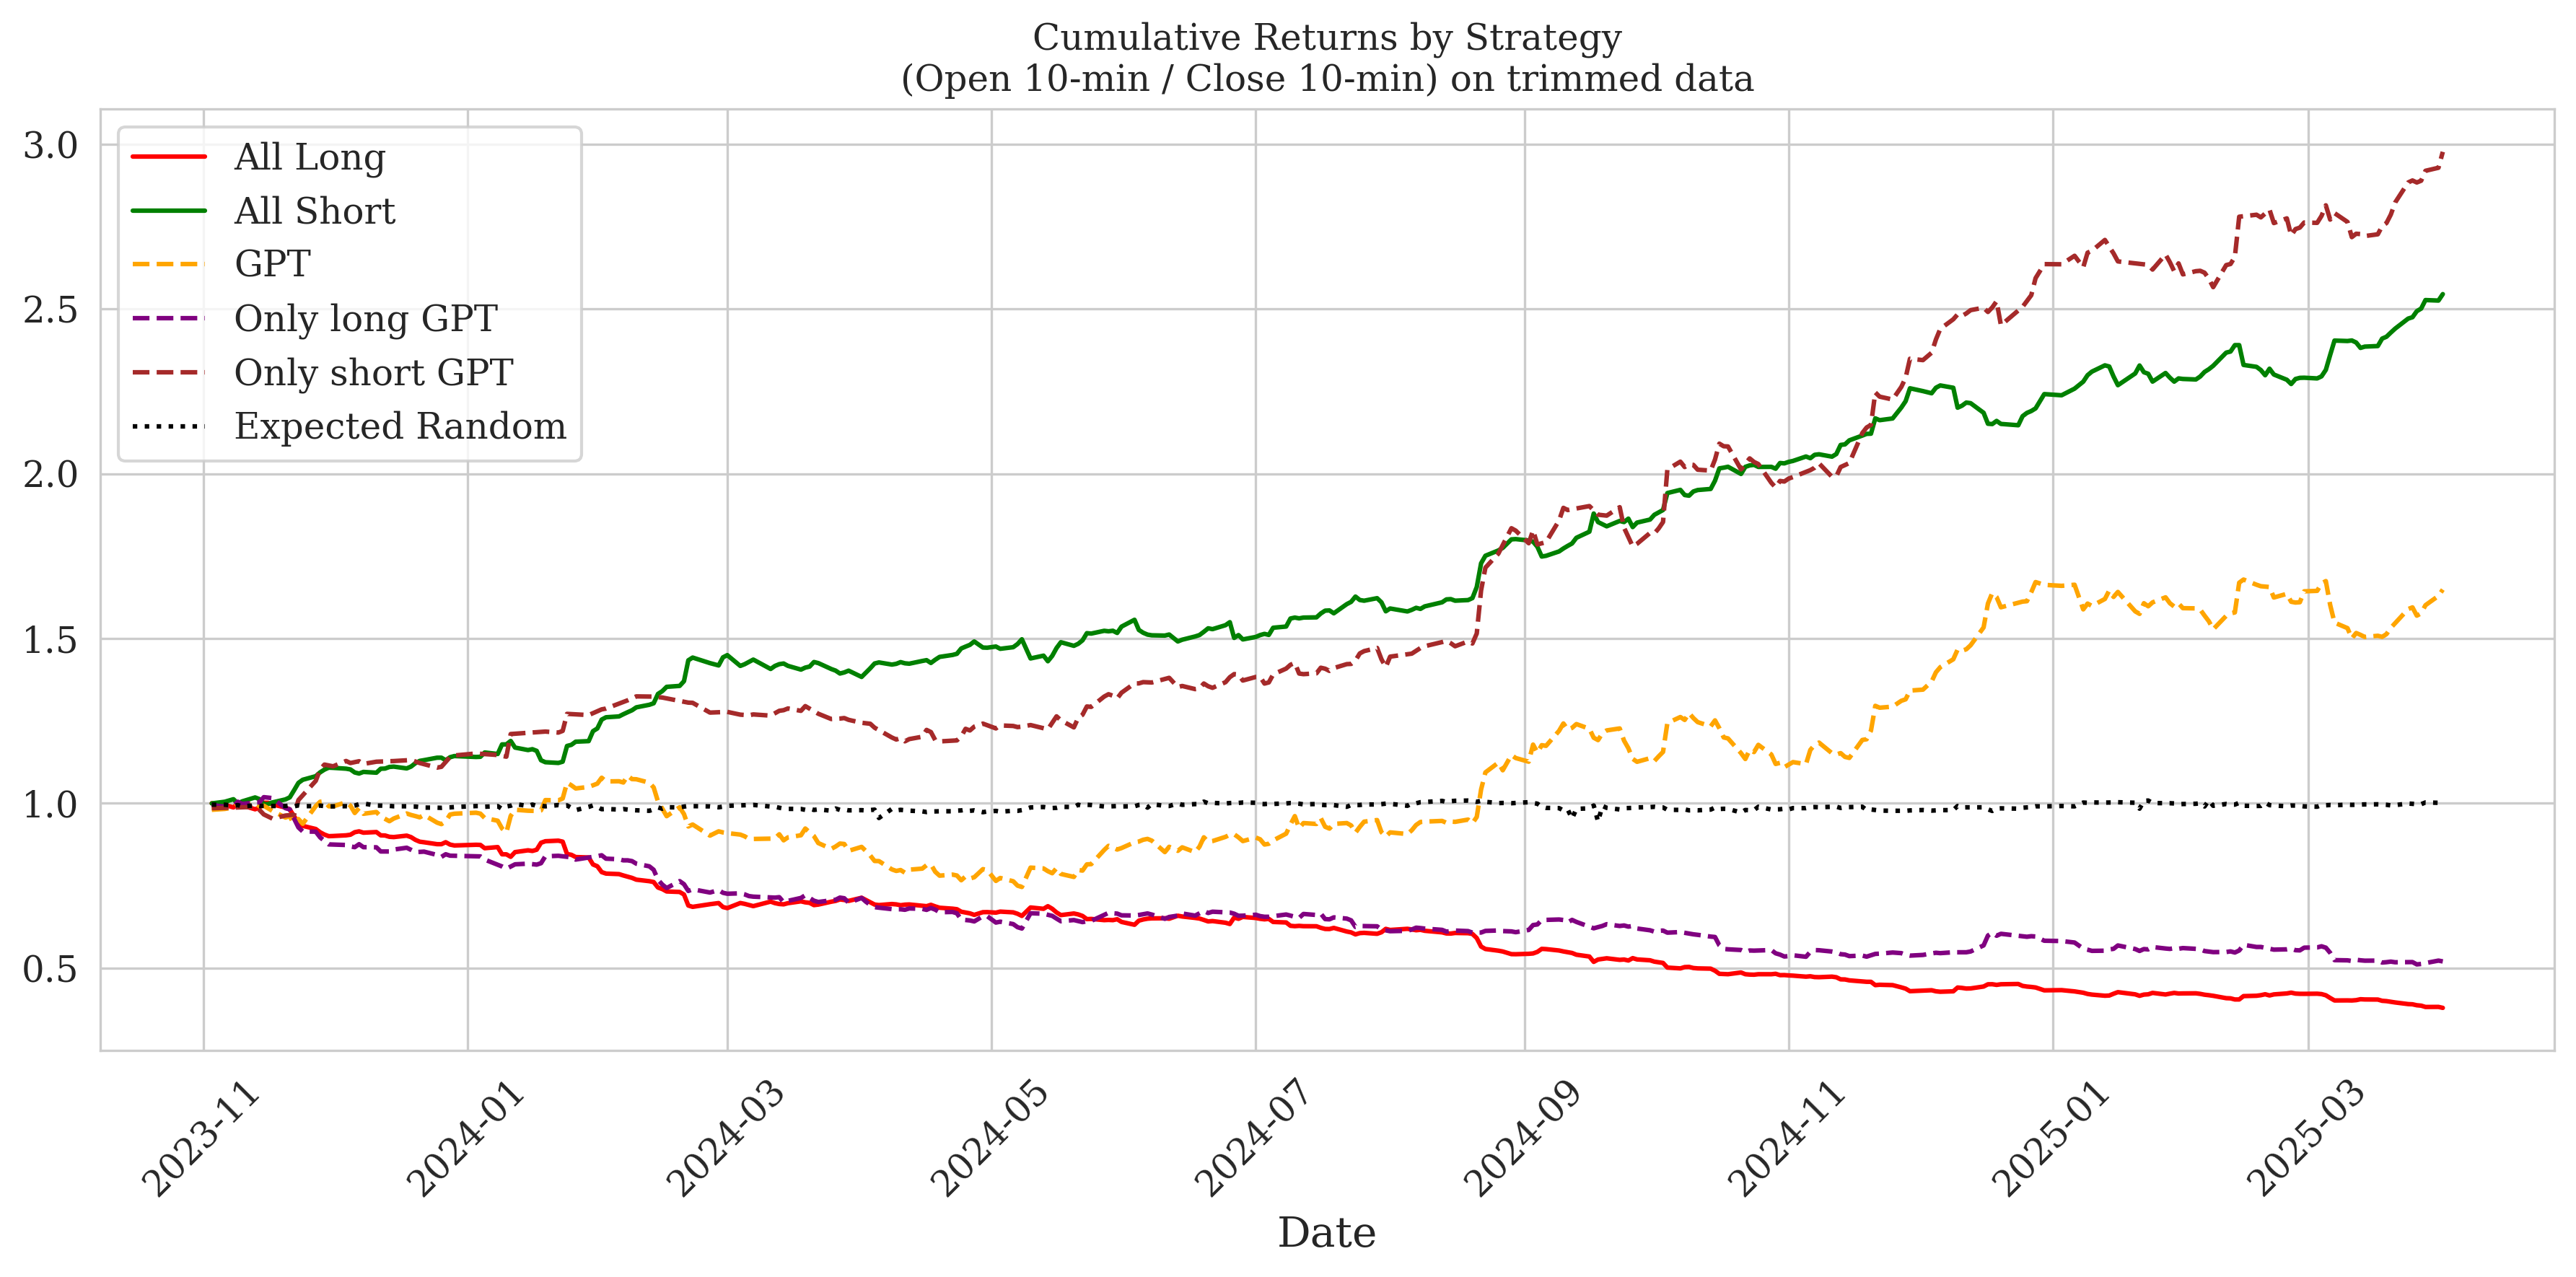

In [218]:
metrics_trimmed = portfolio.plot_with_random(portfolios_trimmed, mean_random_trimmed, random_metrics_trimmed, output_prefix='plots/cum_return__trimmed', title='Cumulative Returns by Strategy\n(Open 10-min / Close 10-min) on trimmed data')